In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("ts_data.csv")

df = df.rename(columns={"Fidesz: (Hungary)": "Search"})
df

,Month,Search
0,2004-01,0
1,2004-02,18
2,2004-03,0
3,2004-04,24
4,2004-05,8
...,...,...
240,2024-01,8
241,2024-02,14
242,2024-03,10
243,2024-04,15


In [3]:
df = df.set_index("Month")
df.index = pd.to_datetime(df.index)
df.index = df.index.rename("YearMonth")

In [4]:
df.head()

,Search
YearMonth,
2004-01-01,0
2004-02-01,18
2004-03-01,0
2004-04-01,24
2004-05-01,8


<Axes: xlabel='YearMonth'>

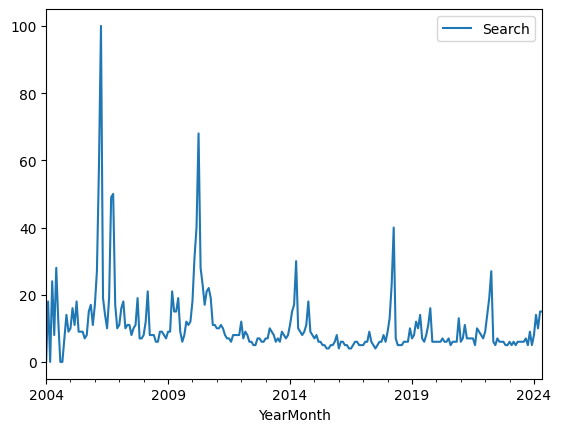

In [5]:
df.plot()

In [6]:
# create features and label
def create_features(df):
    df = df.copy()
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    return df

df = create_features(df)


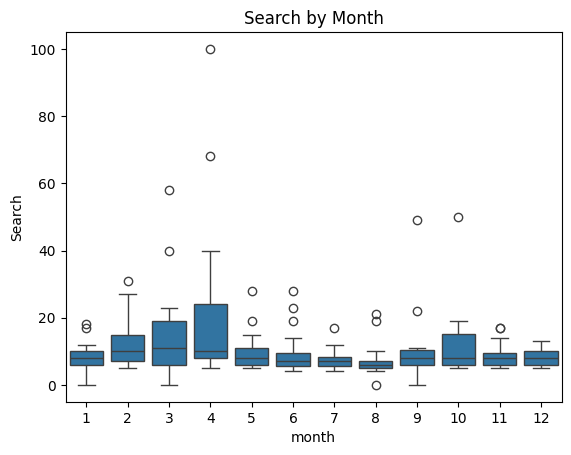

In [7]:
import seaborn as sns

fig, ax = plt.subplots()
sns.boxplot(data=df, x="month", y="Search")
ax.set_title("Search by Month")
plt.show()

In [8]:
df

,Search,quarter,month,year
YearMonth,,,,
2004-01-01,0,1,1,2004
2004-02-01,18,1,2,2004
2004-03-01,0,1,3,2004
2004-04-01,24,2,4,2004
2004-05-01,8,2,5,2004
...,...,...,...,...
2024-01-01,8,1,1,2024
2024-02-01,14,1,2,2024
2024-03-01,10,1,3,2024


In [9]:
features = ["quarter", "month", "year"]
label = "Search"

x = df[features].to_numpy()
y = df[label].to_numpy()
x, y

(array([[   1,    1, 2004],
        [   1,    2, 2004],
        [   1,    3, 2004],
        [   2,    4, 2004],
        [   2,    5, 2004],
        [   2,    6, 2004],
        [   3,    7, 2004],
        [   3,    8, 2004],
        [   3,    9, 2004],
        [   4,   10, 2004],
        [   4,   11, 2004],
        [   4,   12, 2004],
        [   1,    1, 2005],
        [   1,    2, 2005],
        [   1,    3, 2005],
        [   2,    4, 2005],
        [   2,    5, 2005],
        [   2,    6, 2005],
        [   3,    7, 2005],
        [   3,    8, 2005],
        [   3,    9, 2005],
        [   4,   10, 2005],
        [   4,   11, 2005],
        [   4,   12, 2005],
        [   1,    1, 2006],
        [   1,    2, 2006],
        [   1,    3, 2006],
        [   2,    4, 2006],
        [   2,    5, 2006],
        [   2,    6, 2006],
        [   3,    7, 2006],
        [   3,    8, 2006],
        [   3,    9, 2006],
        [   4,   10, 2006],
        [   4,   11, 2006],
        [   4,   12,

In [11]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=42)

In [19]:
quarter, month, year = x_train[:, 0], x_train[:, 1], x_train[:, 2]

In [26]:
date_strings = [f"{m:02d}-{y}" for m, y in zip(month, year)]
date_strings


['08-2023',
 '01-2023',
 '02-2019',
 '06-2004',
 '09-2008',
 '06-2014',
 '05-2016',
 '07-2013',
 '06-2009',
 '01-2015',
 '05-2021',
 '06-2018',
 '08-2006',
 '01-2005',
 '12-2006',
 '05-2006',
 '07-2007',
 '01-2024',
 '07-2014',
 '10-2011',
 '10-2017',
 '04-2008',
 '12-2011',
 '09-2015',
 '04-2020',
 '05-2010',
 '06-2007',
 '01-2013',
 '09-2022',
 '07-2010',
 '01-2016',
 '03-2006',
 '09-2023',
 '06-2023',
 '05-2019',
 '03-2020',
 '01-2004',
 '03-2004',
 '06-2010',
 '11-2007',
 '05-2012',
 '06-2015',
 '04-2016',
 '08-2018',
 '07-2011',
 '02-2011',
 '11-2018',
 '07-2017',
 '03-2012',
 '01-2007',
 '12-2015',
 '02-2009',
 '11-2005',
 '11-2013',
 '03-2017',
 '05-2015',
 '12-2004',
 '12-2023',
 '04-2006',
 '07-2016',
 '05-2004',
 '03-2014',
 '09-2006',
 '10-2015',
 '09-2018',
 '07-2015',
 '03-2009',
 '04-2015',
 '09-2014',
 '06-2022',
 '06-2019',
 '11-2009',
 '11-2023',
 '05-2009',
 '09-2007',
 '05-2022',
 '05-2007',
 '04-2014',
 '12-2005',
 '04-2019',
 '04-2024',
 '10-2010',
 '04-2007',
 '02

C:\Users\richa\AppData\Local\Temp\ipykernel_8572\213211463.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_dates = pd.to_datetime(train_dates.Date)


0     2023-08-01
1     2023-01-01
2     2019-02-01
3     2004-06-01
4     2008-09-01
         ...    
166   2012-11-01
167   2005-03-01
168   2011-09-01
169   2018-12-01
170   2012-07-01
Name: Date, Length: 171, dtype: datetime64[ns]

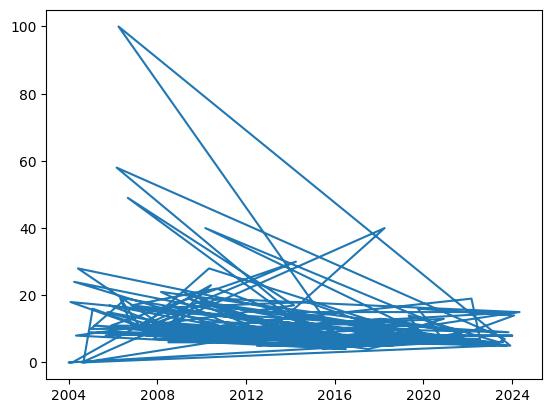